In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import plotly.plotly as py
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# Import data and create df

data = pd.read_csv("/Users/Stacy/Documents/WebDevelopment/projects/sexualAssault_datasets/2010-2018_sexcrimes_violentcrimes.csv", index_col="CAD Event Number")
data = pd.DataFrame(data)
data.head()

,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
CAD Event Number,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,02/27/2010 10:54:25 PM,Feb 27 2010 10:55:45:000PM,NORTH,UNION,U1
2010000000327,PHYSICAL ARREST MADE,911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,01/01/2010 03:13:06 AM,Jan 1 2010 03:14:51:000AM,SOUTH,ROBERT,R3
2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,01/01/2010 05:46:54 AM,Jan 1 2010 06:39:35:000AM,NORTH,UNION,U1
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 06:28:49 AM,Jan 1 2010 06:40:09:000AM,EAST,GEORGE,G1
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 03:05:57 PM,Jan 1 2010 03:12:26:000PM,SOUTHWEST,FRANK,F3


In [4]:
# Rename columns to be pythonic

data.columns = ['event_clearing', 'call_type', 'priority', 
                'initial_call_type', 'final_call_type', 'original_time_queued',
               'arrived_time', 'precinct', 'sector', 'beat']

data.head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat
CAD Event Number,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,02/27/2010 10:54:25 PM,Feb 27 2010 10:55:45:000PM,NORTH,UNION,U1
2010000000327,PHYSICAL ARREST MADE,911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,01/01/2010 03:13:06 AM,Jan 1 2010 03:14:51:000AM,SOUTH,ROBERT,R3
2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,01/01/2010 05:46:54 AM,Jan 1 2010 06:39:35:000AM,NORTH,UNION,U1
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 06:28:49 AM,Jan 1 2010 06:40:09:000AM,EAST,GEORGE,G1
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 03:05:57 PM,Jan 1 2010 03:12:26:000PM,SOUTHWEST,FRANK,F3


In [5]:
# ID all calls cancelled by dispatch
cancelled_calls = data[data.event_clearing.str.contains("CANCELLED")]

# Delete rows with cxl'd calls

data = data[data.event_clearing != 'RESPONDING UNIT(S) CANCELLED BY RADIO']
data = data[data.event_clearing != 'DUPLICATED OR CANCELLED BY RADIO']


In [6]:
# Change original_time_queued to datetime
data['original_time_queued'] = pd.to_datetime(data.original_time_queued)

# Change arrived_time to datetime
data['arrived_time'] = pd.to_datetime(data.arrived_time, format='%b %d %Y %I:%M:%S:%f%p')

# Add time delta between original_time_queued and arrived_time
data['time_delta'] = ((data.arrived_time - data.original_time_queued)/np.timedelta64(1, 's')).astype(int)

In [7]:
# Add columns for arrived year and month

data['year'] = data.arrived_time.dt.year
data['month'] = data.arrived_time.dt.month

In [8]:
# For rows with bad arrived time: change month and year to original_time_queued
# Where arrive_time year = 1900, change data.year and data.month to original_time_queued year

mask = data.year < 1901
column_name_year = 'year'
column_name_month = 'month'
data.loc[mask, column_name_year] = data.original_time_queued.dt.year
data.loc[mask, column_name_month] = data.original_time_queued.dt.month


data.year.value_counts()

2018    2827
2016    2624
2017    2543
2015    2491
2014    2170
2012    2162
2013    2159
2011    2118
2010    2010
Name: year, dtype: int64

In [9]:
call_types = data['final_call_type'].unique().tolist()
call_types

['--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT',
 '--ASSAULTS - FIREARM INVOLVED',
 '--ROBBERY - ARMED',
 '--RAPE - KNOWN SUSPECT (ACQUAINTANCE)',
 '--RAPE - UNKNOWN SUSPECT (STRANGER)',
 '--HOMICIDE',
 '--SEX OFFENSES (RAPE) - MOLESTING',
 '--KIDNAP - GENERAL',
 '--DRIVE BY SHOOTING - NO INJURIES',
 '--COMMERCIAL SEXUAL EXPLOITATION OF MINORS (CSEC)']

In [10]:
# Define TRU initial call types
TRU_call_types = [
    'TRU - ASLT - WITH OR W/O WPNS (NO SHOOTINGS)',
    'TRU - RAPE',
    'TRU - LEWD CONDUCT',
    'TRU - CHILD ABUSED, NEGLECTED',
    'TRU - THREATS',
    'TRU - ROBBERY',
    'TRU - ASLT - MOLESTED ADULT (GROPED, FONDLED, ETC)',
    'TRU - HARASSMENT',
    'TRU - SEX IN PUBLIC',
    'TRU - THEFT',
    'TRU - FOLLOW UP',
    'TRU - MVC - HIT AND RUN',
    'TRU - LURING',
    'TRU - FORGERY/CHKS/BUNCO/SCAMS/ID THEFT',
    'TRU - SUSPICIOUS CIRCUMSTANCES']

In [11]:
# Define terms that id rape CFS
rape_terms = 'STRANGER|ACQUAINTANCE'
rape_call_types = [
    '--RAPE - KNOWN SUSPECT (ACQUAINTANCE)',
    '--RAPE - UNKNOWN SUSPECT (STRANGER)']

rape_call_types

['--RAPE - KNOWN SUSPECT (ACQUAINTANCE)',
 '--RAPE - UNKNOWN SUSPECT (STRANGER)']

In [12]:
# Define terms that id other violent crimes
violent_crime_call_types = [
    '--ASSAULTS - FIREARM INVOLVED',
    '--ROBBERY - ARMED',
    '--HOMICIDE',
    '--KIDNAP - GENERAL',
    '--DRIVE BY SHOOTING - NO INJURIES']

violent_crime_call_types

['--ASSAULTS - FIREARM INVOLVED',
 '--ROBBERY - ARMED',
 '--HOMICIDE',
 '--KIDNAP - GENERAL',
 '--DRIVE BY SHOOTING - NO INJURIES']

In [13]:
# ID all clearing codes
clearing_codes = data['event_clearing'].unique().tolist()
# clearing_codes

In [14]:
# ID arrest clearing codes

arrest_cc = ['PHYSICAL ARREST MADE']

## Add columns for arrest, TRU, and crime type

In [15]:
# Add column identifying if there was an arrest

data['is_arrest'] = np.where(data['event_clearing'].isin(arrest_cc), 'yes', 'no')

In [16]:
# Add column identifying if this was A TRU call

data['is_TRU'] = np.where(data['initial_call_type'].isin(TRU_call_types), 'yes', 'no')

# data.is_TRU.unique().tolist()

In [17]:
# Add column identifying crime type
data['crime_type'] = np.where(data['final_call_type'].isin(rape_call_types), 'rape', 'violent crime')

data.head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month,is_arrest,is_TRU,crime_type
CAD Event Number,,,,,,,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-02-27 22:54:25,2010-02-27 22:55:45,NORTH,UNION,U1,80,2010,2,no,no,violent crime
2010000000327,PHYSICAL ARREST MADE,911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,2010-01-01 03:13:06,2010-01-01 03:14:51,SOUTH,ROBERT,R3,105,2010,1,yes,no,violent crime
2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,2010-01-01 05:46:54,2010-01-01 06:39:35,NORTH,UNION,U1,3161,2010,1,no,no,violent crime
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 06:28:49,2010-01-01 06:40:09,EAST,GEORGE,G1,680,2010,1,no,no,rape
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 15:05:57,2010-01-01 15:12:26,SOUTHWEST,FRANK,F3,389,2010,1,no,no,rape


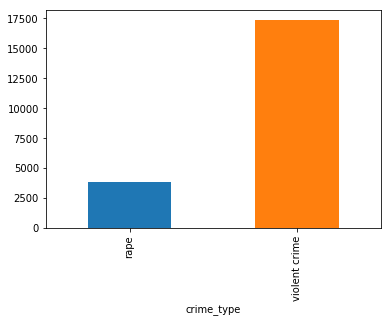

In [18]:
# Count of rape calls v. other violent crime calls

data['final_call_type'].groupby(data['crime_type']).count().plot(kind='bar')

In [19]:
# Use crosstab to return value counts
# Reference: https://colab.research.google.com/drive/1VtMSdMy396U6BGVdz2qRsgRveYW9uTHi#scrollTo=FVB-Gc0lAH1W
# and: https://stackoverflow.com/questions/53108063/python-pandas-data-visualization-how-to-get-percentages-for-each-row-and-v

arrest_percent = pd.crosstab(data.crime_type,data.is_arrest,
                          normalize = 'index').rename_axis(None)

# Multiply all percentages by 100 for graphing. 
arrest_percent *= 100

arrest_percent

is_arrest,no,yes
rape,93.751655,6.248345
violent crime,90.846656,9.153344


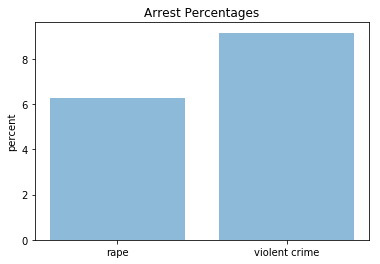

In [20]:
# Plot only arrests as bar graph. 
plt.bar(arrest_percent.index, arrest_percent.yes, align='center', alpha=0.5)
plt.ylabel('percent')
plt.title('Arrest Percentages')

plt.show()

In [21]:
# Create crosstab to view all arrests by call type

all_calls_arrest = pd.crosstab(data.final_call_type,data.is_arrest,
                          normalize = 'index').rename_axis(None)
all_calls_arrest *= 100

all_calls_arrest

is_arrest,no,yes
--ASSAULTS - FIREARM INVOLVED,88.855055,11.144945
--COMMERCIAL SEXUAL EXPLOITATION OF MINORS (CSEC),88.461538,11.538462
--DRIVE BY SHOOTING - NO INJURIES,96.675416,3.324584
--HOMICIDE,93.023256,6.976744
--KIDNAP - GENERAL,73.232323,26.767677
--RAPE - KNOWN SUSPECT (ACQUAINTANCE),92.529489,7.470511
--RAPE - UNKNOWN SUSPECT (STRANGER),95.631720,4.368280
--ROBBERY - ARMED,87.385087,12.614913
--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,93.071042,6.928958
--SEX OFFENSES (RAPE) - MOLESTING,94.352617,5.647383


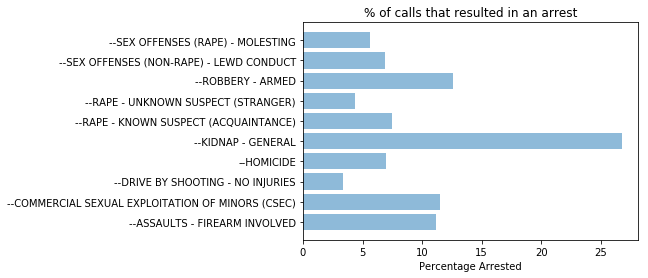

In [22]:
# Plot only arrest percentages as bar graph. 
plt.barh(all_calls_arrest.index, all_calls_arrest.yes, align='center', alpha=0.5, orientation='horizontal')
plt.xlabel('Percentage Arrested')
plt.title('% of calls that resulted in an arrest')
#plt.xticks(rotation=90)

plt.show()

## Analysis of rate of arrests (rape v. VC) by year

### To Do:
* Add year to arrest_percent analysis

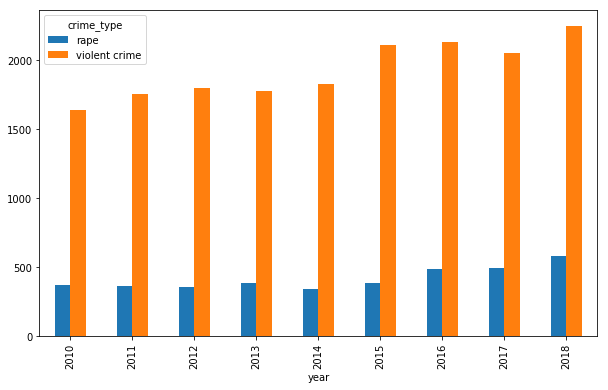

In [23]:
# year by year analysis of arrests rape v. VC - counts


data.groupby('crime_type').year.value_counts().unstack(0).plot.bar(stacked=False, figsize=(10,6))


In [24]:
# Create new df that shows arrest counts by each year for both crime types

arrests_grouped = data.groupby(["crime_type","year", "is_arrest"]).count()

arrests_grouped.head()

event_clearing  call_type  priority  \
crime_type year is_arrest                                        
rape       2010 no                    345        345       345   
                yes                    29         29        29   
           2011 no                    338        338       338   
                yes                    25         25        25   
           2012 no                    324        324       324   

                           initial_call_type  final_call_type  \
crime_type year is_arrest                                       
rape       2010 no                       345              345   
                yes                       29               29   
           2011 no                       338              338   
                yes                       25               25   
           2012 no                       324              324   

                           original_time_queued  arrived_time  precinct  \
crime_type year is_arrest                                                 
rape       2010 no                          345           345       345   
                yes                          29            29        29   
           2011 no                          338           338       338   
                yes                          25            25        25   
           2012 no                          324           324       324   

                           sector  beat  time_delta  month  is_TRU  
crime_type year is_arrest                                           
rape       2010 no            340   345         345    345     345  
                yes            28    29          29     29      29  
           2011 no            321   338         338    338     338  
                yes            25    25          25     25      25  
           2012 no            309   324         324    324     324

In [ ]:
#this is being used on other notebook, keeping year by year data:
stage_is_violent_crime.groupby('event_clearing').year.value_counts().unstack(0).plot.bar(stacked=False, figsize=(12,8), )


In [26]:
# Calculate arrest percentages by crime type for each year
arrest_percent_by_yr = pd.crosstab([data.crime_type, data.year],data.is_arrest,
                         normalize = 'index')

# Multiply all percentages by 100 for graphing. 
arrest_percent_by_yr *= 100

arrest_percent_by_yr.head()

is_arrest               no        yes
crime_type year                      
rape       2010  92.245989   7.754011
           2011  93.112948   6.887052
           2012  89.750693  10.249307
           2013  93.506494   6.493506
           2014  95.086705   4.913295

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ceb6a20>,
      dtype=object)

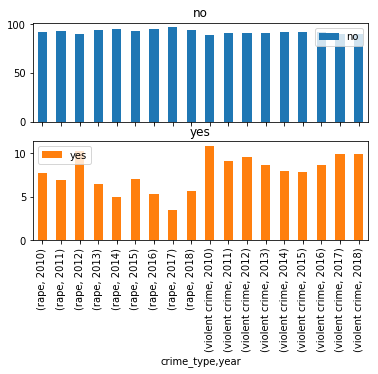

In [27]:
# year by year analysis of arrest percentages rape v. VC - counts


#arrest_percent.groupby('crime_type').year.value_counts().unstack(0).plot.bar(stacked=False, figsize=(10,6))
#arrest_percent_by_yr.groupby(level=[['rape', 'violent crime'], [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]]).year.value_counts().unstack(0).plot.bar(stacked=False, figsize=(12,8), )


arrest_percent_by_yr.plot(kind='bar', subplots=True)

# Plot only arrests as bar graph. 
#plt.bar(arrest_percent_by_yr['rape', 'violent crime'], arrest_percent.yes, align='center', alpha=0.5)
#plt.ylabel('percent')
#plt.title('Arrest Percentages')

#plt.show()


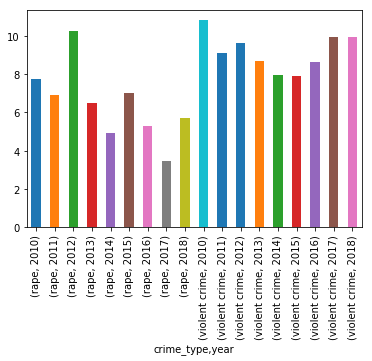

In [28]:
# Plot % of arrests by crime type for each year.
# Need to group the two crime types together for each year

arrest_percent_by_yr['yes'].plot(kind='bar')

#arrest_percent_by_yr.groupby('crime_type')['yes'].plot(kind='bar')

## TRU work

In [29]:
# Create crosstab to view % all TRU calls by crime type

percentage_tru_calls = pd.crosstab(data.final_call_type,data.is_TRU,
                          normalize = 'index').rename_axis(None)
percentage_tru_calls *= 100

percentage_tru_calls

is_TRU,no,yes
--ASSAULTS - FIREARM INVOLVED,99.025579,0.974421
--COMMERCIAL SEXUAL EXPLOITATION OF MINORS (CSEC),98.076923,1.923077
--DRIVE BY SHOOTING - NO INJURIES,99.912511,0.087489
--HOMICIDE,100.000000,0.000000
--KIDNAP - GENERAL,98.989899,1.010101
--RAPE - KNOWN SUSPECT (ACQUAINTANCE),97.597204,2.402796
--RAPE - UNKNOWN SUSPECT (STRANGER),98.655914,1.344086
--ROBBERY - ARMED,99.914879,0.085121
--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,99.076139,0.923861
--SEX OFFENSES (RAPE) - MOLESTING,97.176309,2.823691


In [59]:
tru_percent_by_yr.final_call_type.unique().tolist()

['--ASSAULTS - FIREARM INVOLVED',
 '--COMMERCIAL SEXUAL EXPLOITATION OF MINORS (CSEC)',
 '--DRIVE BY SHOOTING - NO INJURIES',
 '--HOMICIDE',
 '--KIDNAP - GENERAL',
 '--RAPE - KNOWN SUSPECT (ACQUAINTANCE)',
 '--RAPE - UNKNOWN SUSPECT (STRANGER)',
 '--ROBBERY - ARMED',
 '--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT',
 '--SEX OFFENSES (RAPE) - MOLESTING']

In [73]:
# Calculate TRU percentages by crime type for each year
tru_percent_by_yr = pd.crosstab([data.final_call_type, data.year],data.is_TRU,
                         normalize = 'index')

# Multiply all percentages by 100 for graphing. 
tru_percent_by_yr *= 100

tru_percent_by_yr

is_TRU                                                          no        yes
final_call_type                                   year                       
--ASSAULTS - FIREARM INVOLVED                     2010  100.000000   0.000000
                                                  2011   99.236641   0.763359
                                                  2012  100.000000   0.000000
                                                  2013   97.826087   2.173913
                                                  2014   97.023810   2.976190
                                                  2015   99.111111   0.888889
                                                  2016   97.989950   2.010050
                                                  2017  100.000000   0.000000
                                                  2018   99.519231   0.480769
--COMMERCIAL SEXUAL EXPLOITATION OF MINORS (CSEC) 2011  100.000000   0.000000
                                                  2012  100.000000   0.000000
                                                  2013  100.000000   0.000000
                                                  2014  100.000000   0.000000
                                                  2015  100.000000   0.000000
                                                  2016  100.000000   0.000000
                                                  2017  100.000000   0.000000
                                                  2018   87.500000  12.500000
--DRIVE BY SHOOTING - NO INJURIES                 2010  100.000000   0.000000
                                                  2011  100.000000   0.000000
                                                  2012  100.000000   0.000000
                                                  2013  100.000000   0.000000
                                                  2014  100.000000   0.000000
                                                  2015  100.000000   0.000000
                                                  2016  100.000000   0.000000
                                                  2017  100.000000   0.000000
                                                  2018   98.876404   1.123596
--HOMICIDE                                        2010  100.000000   0.000000
                                                  2011  100.000000   0.000000
                                                  2012  100.000000   0.000000
                                                  2013  100.000000   0.000000
...                                                            ...        ...
--RAPE - UNKNOWN SUSPECT (STRANGER)               2016   98.918919   1.081081
                                                  2017   98.882682   1.117318
                                                  2018   98.598131   1.401869
--ROBBERY - ARMED                                 2010  100.000000   0.000000
                                                  2011   99.861496   0.138504
                                                  2012  100.000000   0.000000
                                                  2013  100.000000   0.000000
                                                  2014  100.000000   0.000000
                                                  2015   99.540582   0.459418
                                                  2016  100.000000   0.000000
                                                  2017  100.000000   0.000000
                                                  2018   99.846861   0.153139
--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT          2010   99.624060   0.375940
                                                  2011   98.754448   1.245552
                                                  2012   99.090909   0.909091
                                                  2013   98.639456   1.360544
                                                  2014   99.233129   0.766871
                                                  2015   98.623279   1.376721
                      

In [83]:
tru_percent_by_yr.reset_index(inplace=True)
tru_percent_by_yr

is_TRU,index,final_call_type,year,yes
0,0,--ASSAULTS - FIREARM INVOLVED,2010,0.000000
1,1,--ASSAULTS - FIREARM INVOLVED,2011,0.763359
2,2,--ASSAULTS - FIREARM INVOLVED,2012,0.000000
3,3,--ASSAULTS - FIREARM INVOLVED,2013,2.173913
4,4,--ASSAULTS - FIREARM INVOLVED,2014,2.976190
5,5,--ASSAULTS - FIREARM INVOLVED,2015,0.888889
6,6,--ASSAULTS - FIREARM INVOLVED,2016,2.010050
7,7,--ASSAULTS - FIREARM INVOLVED,2017,0.000000
8,8,--ASSAULTS - FIREARM INVOLVED,2018,0.480769
9,9,--COMMERCIAL SEXUAL EXPLOITATION OF MINORS (CSEC),2011,0.000000


In [75]:
# Remove no values
tru_percent_by_yr = tru_percent_by_yr.drop('no', axis=1)

In [76]:
tru_percent_by_yr.final_call_type.unique().tolist()

['--ASSAULTS - FIREARM INVOLVED',
 '--COMMERCIAL SEXUAL EXPLOITATION OF MINORS (CSEC)',
 '--DRIVE BY SHOOTING - NO INJURIES',
 '--HOMICIDE',
 '--KIDNAP - GENERAL',
 '--RAPE - KNOWN SUSPECT (ACQUAINTANCE)',
 '--RAPE - UNKNOWN SUSPECT (STRANGER)',
 '--ROBBERY - ARMED',
 '--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT',
 '--SEX OFFENSES (RAPE) - MOLESTING']

In [99]:
# Separate data by crime type for visualization

tru_firearm_assault_by_yr = tru_percent_by_yr[tru_percent_by_yr['final_call_type'].str.contains("FIREARM")]
tru_CSEC_by_yr = tru_percent_by_yr[tru_percent_by_yr['final_call_type'].str.contains("CSEC")]
tru_driveby_by_yr = tru_percent_by_yr[tru_percent_by_yr['final_call_type'].str.contains("DRIVE")]
tru_homicide_by_yr = tru_percent_by_yr[tru_percent_by_yr['final_call_type'].str.contains("HOMICIDE")]
tru_kidnap_by_yr = tru_percent_by_yr[tru_percent_by_yr['final_call_type'].str.contains("KIDNAP")]
tru_acquaintance_by_yr = tru_percent_by_yr[tru_percent_by_yr['final_call_type'].str.contains("ACQUAINTANCE")]
tru_stranger_by_yr = tru_percent_by_yr[tru_percent_by_yr['final_call_type'].str.contains("STRANGER")]
tru_robbery_by_yr = tru_percent_by_yr[tru_percent_by_yr['final_call_type'].str.contains("ROBBERY")]
tru_lewd_by_yr = tru_percent_by_yr[tru_percent_by_yr['final_call_type'].str.contains("LEWD")]
tru_molest_by_yr = tru_percent_by_yr[tru_percent_by_yr['final_call_type'].str.contains("MOLESTING")]


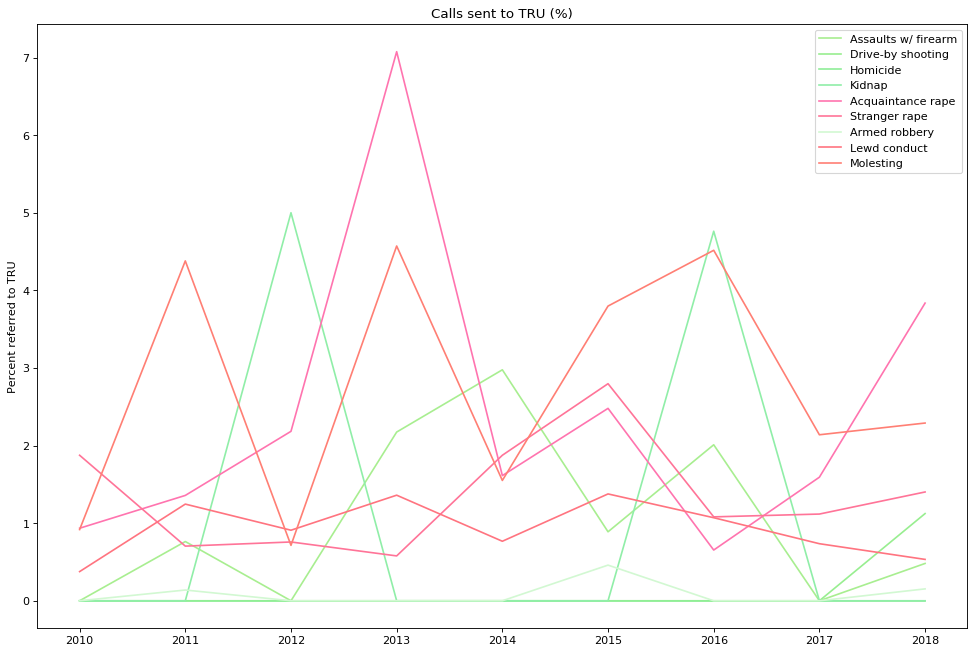

In [117]:
# Plot percentage of calls sent to TRU by year.

plt.figure(figsize=(15,10), dpi= 80)

plt.plot(tru_firearm_assault_by_yr.year, tru_firearm_assault_by_yr.yes, color='#a8ee90', label='Assaults w/ firearm')
#plt.plot(tru_CSEC_by_yr.year, tru_CSEC_by_yr.yes, color='orange', label='CSEC')
plt.plot(tru_driveby_by_yr.year, tru_driveby_by_yr.yes, color='#98ee90', label='Drive-by shooting')
plt.plot(tru_homicide_by_yr.year, tru_homicide_by_yr.yes, color='#90ee98', label='Homicide')
plt.plot(tru_kidnap_by_yr.year, tru_kidnap_by_yr.yes, color='#90eea8', label='Kidnap')
plt.plot(tru_acquaintance_by_yr.year, tru_acquaintance_by_yr.yes, color='#ff74af', label='Acquaintance rape')
plt.plot(tru_stranger_by_yr.year, tru_stranger_by_yr.yes, color='#ff7498', label='Stranger rape')
plt.plot(tru_robbery_by_yr.year, tru_robbery_by_yr.yes, color='#d2f8d2', label='Armed robbery')
plt.plot(tru_lewd_by_yr.year, tru_lewd_by_yr.yes, color='#ff7480', label='Lewd conduct')
plt.plot(tru_molest_by_yr.year, tru_molest_by_yr.yes, color='#ff7f74', label='Molesting')


plt.ylabel('Percent referred to TRU')
plt.title('Calls sent to TRU (%)')
plt.legend()

plt.show()

In [95]:
# Can delete at end of day
# View CSEC calls that were sent to TRU

temp = data['is_TRU'] == "yes"
temp2 = data['final_call_type'].str.contains("CSEC")
data[temp & temp2]

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month,is_arrest,is_TRU,crime_type
CAD Event Number,,,,,,,,,,,,,,,,
2018000028999,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",5,"TRU - CHILD ABUSED, NEGLECTED",--COMMERCIAL SEXUAL EXPLOITATION OF MINORS (CSEC),2018-01-24 12:39:10,2018-01-24 12:39:18,UNKNOWN,NaN,COMM,8,2018,1,no,yes,violent crime


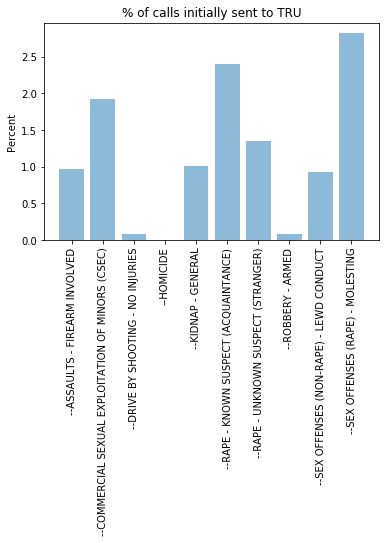

In [30]:
# Plot TRU call percentages as bar graph. 
plt.bar(percentage_tru_calls.index, percentage_tru_calls.yes, align='center', alpha=0.5)
plt.ylabel('Percent')
plt.title('% of calls initially sent to TRU')
plt.xticks(rotation=90)

plt.show()

## TRU breakdown
**CSEC:**
only 1 of the 52 CSEC calls were referred to TRU in 9 years.
**code:**
Show that only 1 of the 52 CSEC calls were referred to TRU in 9 years:
temp_TRU_df = data[data.is_TRU == 'yes']
temp_TRU_CSEC = temp_TRU_df[temp_TRU_df.final_call_type == '--COMMERCIAL SEXUAL EXPLOITATION OF MINORS (CSEC)']
temp_TRU_CSEC

Show all CSEC calls:
data[data.final_call_type == '--COMMERCIAL SEXUAL EXPLOITATION OF MINORS (CSEC)'].count()

**molesting:**
41 to TRU out of 1452 calls

**kidnap:**
2 out of 198 send to TRU

**assault w firearm:**
16 out of 1642

**driveby:**
1 out of 1143

**acquaintance rape:**
55 out of 2289

**stranger rape:**
20 out of 1488

**armed robbery:**
5 out of 5874

**lewd conduct:**
58 out of 6278

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



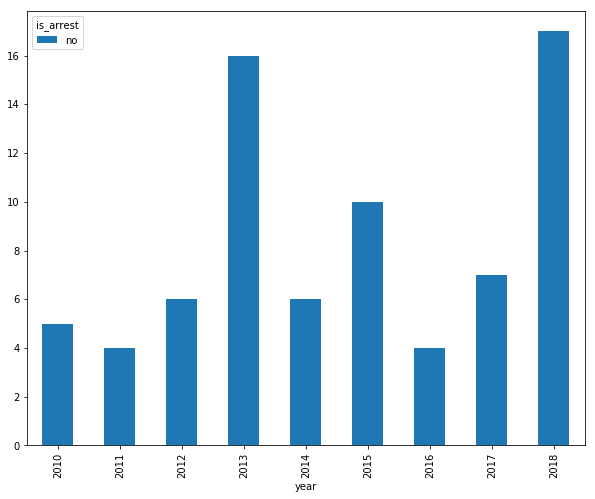

In [31]:
# Show TRU rape calls by year

temp_TRU_df = data[data.is_TRU == 'yes']
temp_TRU_df = temp_TRU_df[data.crime_type == "rape"]

temp_TRU_df.groupby('is_arrest').year.value_counts().unstack(0).plot.bar(stacked=False, figsize=(10,8))


In [91]:
# Do above by in percentages

In [32]:
# Create crosstab to view % TRU rape calls vs. TRU VC calls

tru_calls_rape_vc = pd.crosstab(data.crime_type,data.is_TRU,
                          normalize = 'index').rename_axis(None)
tru_calls_rape_vc *= 100

tru_calls_rape_vc

is_TRU,no,yes
rape,98.014297,1.985703
violent crime,99.284354,0.715646


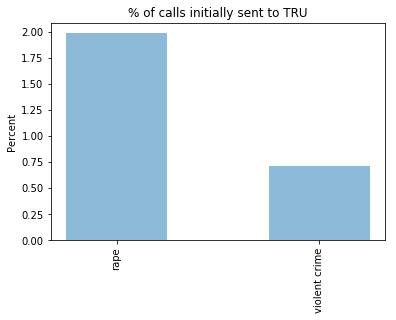

In [33]:
# Plot percentage TRU calls rape v. VC as bar graph. 
plt.bar(tru_calls_rape_vc.index, tru_calls_rape_vc.yes, align='center', alpha=0.5, width=0.5)
plt.ylabel('Percent')
plt.title('% of calls initially sent to TRU')
plt.xticks(rotation=90)

plt.show()

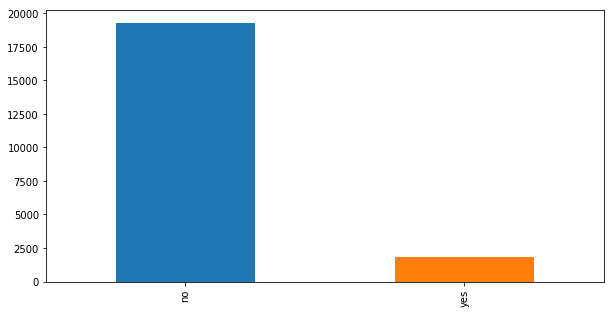

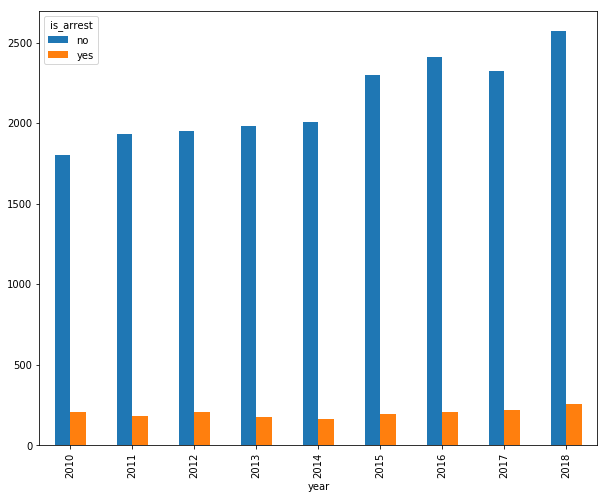

In [34]:
# example viz only
pd.value_counts(data.is_arrest).plot.bar(figsize=(10,5))
data.groupby('is_arrest').year.value_counts().unstack(0).plot.bar(stacked=False, figsize=(10,8))



## Lewd Calls Correlation

In [38]:
data.head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month,is_arrest,is_TRU,crime_type
CAD Event Number,,,,,,,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-02-27 22:54:25,2010-02-27 22:55:45,NORTH,UNION,U1,80,2010,2,no,no,violent crime
2010000000327,PHYSICAL ARREST MADE,911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,2010-01-01 03:13:06,2010-01-01 03:14:51,SOUTH,ROBERT,R3,105,2010,1,yes,no,violent crime
2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,2010-01-01 05:46:54,2010-01-01 06:39:35,NORTH,UNION,U1,3161,2010,1,no,no,violent crime
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 06:28:49,2010-01-01 06:40:09,EAST,GEORGE,G1,680,2010,1,no,no,rape
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 15:05:57,2010-01-01 15:12:26,SOUTHWEST,FRANK,F3,389,2010,1,no,no,rape


In [37]:
# Remove rows with bad arrived_time

lewd_calls_ip = data[data.arrived_time > '1900-1-1']
lewd_calls_ip.head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month,is_arrest,is_TRU,crime_type
CAD Event Number,,,,,,,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-02-27 22:54:25,2010-02-27 22:55:45,NORTH,UNION,U1,80,2010,2,no,no,violent crime
2010000000327,PHYSICAL ARREST MADE,911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,2010-01-01 03:13:06,2010-01-01 03:14:51,SOUTH,ROBERT,R3,105,2010,1,yes,no,violent crime
2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,2010-01-01 05:46:54,2010-01-01 06:39:35,NORTH,UNION,U1,3161,2010,1,no,no,violent crime
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 06:28:49,2010-01-01 06:40:09,EAST,GEORGE,G1,680,2010,1,no,no,rape
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 15:05:57,2010-01-01 15:12:26,SOUTHWEST,FRANK,F3,389,2010,1,no,no,rape


In [39]:
# Create df for all in progress lewd calls
lewd_calls_ip = lewd_calls_ip[lewd_calls_ip.final_call_type.str.contains("LEWD")]
lewd_calls_ip = lewd_calls_ip[lewd_calls_ip.priority <= 3]
lewd_calls_ip.head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month,is_arrest,is_TRU,crime_type
CAD Event Number,,,,,,,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-02-27 22:54:25,2010-02-27 22:55:45,NORTH,UNION,U1,80,2010,2,no,no,violent crime
2010000001201,ASSISTANCE RENDERED,911,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-01-02 00:37:29,2010-01-02 00:42:16,WEST,DAVID,D2,287,2010,1,no,no,violent crime
2010000001517,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-01-02 11:14:25,2010-01-02 11:35:16,EAST,EDWARD,E1,1251,2010,1,no,no,violent crime
2010000004224,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,ROBBERY (INCLUDES STRONG ARM),--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-01-04 19:46:16,2010-01-04 19:58:43,SOUTHWEST,FRANK,F2,747,2010,1,no,no,violent crime
2010000006248,REPORT WRITTEN (NO ARREST),911,2,SEX IN PUBLIC PLACE/VIEW (INCL MASTURBATION),--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-01-06 15:54:04,2010-01-06 17:15:16,NORTH,JOHN,J1,4872,2010,1,no,no,violent crime


In [40]:
# View count of clearing codes

lewd_calls_ip.event_clearing.value_counts()

ASSISTANCE RENDERED                                                    1837
REPORT WRITTEN (NO ARREST)                                             1501
UNABLE TO LOCATE INCIDENT OR COMPLAINANT                                957
PHYSICAL ARREST MADE                                                    413
ORAL WARNING GIVEN                                                      406
FOLLOW-UP REPORT MADE                                                   174
NO POLICE ACTION POSSIBLE OR NECESSARY                                  123
CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)                              108
STREET CHECK WRITTEN                                                     71
OTHER REPORT MADE                                                        35
INCIDENT LOCATED, PUBLIC ORDER RESTORED                                  18
FALSE COMPLAINT/UNFOUNDED                                                 8
Evidence Submitted (new incident number required)                         8
RADIO BROADC

#### 90% of all clearing codes are covered with terms below

In [41]:
# Define top lewd call clearing codes

top_lewd_cc_terms = 'REPORT WRITTEN|ASSISTANCE RENDERED|PHYSICAL ARREST|UNABLE TO LOCATE|ORAL WARNING'
top_lewd_cc_terms

'REPORT WRITTEN|ASSISTANCE RENDERED|PHYSICAL ARREST|UNABLE TO LOCATE|ORAL WARNING'

In [43]:
lewd_calls_ip = lewd_calls_ip[lewd_calls_ip.event_clearing.str.contains(top_lewd_cc_terms)]
lewd_calls_ip.head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month,is_arrest,is_TRU,crime_type
CAD Event Number,,,,,,,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-02-27 22:54:25,2010-02-27 22:55:45,NORTH,UNION,U1,80,2010,2,no,no,violent crime
2010000001201,ASSISTANCE RENDERED,911,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-01-02 00:37:29,2010-01-02 00:42:16,WEST,DAVID,D2,287,2010,1,no,no,violent crime
2010000001517,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-01-02 11:14:25,2010-01-02 11:35:16,EAST,EDWARD,E1,1251,2010,1,no,no,violent crime
2010000004224,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,ROBBERY (INCLUDES STRONG ARM),--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-01-04 19:46:16,2010-01-04 19:58:43,SOUTHWEST,FRANK,F2,747,2010,1,no,no,violent crime
2010000006248,REPORT WRITTEN (NO ARREST),911,2,SEX IN PUBLIC PLACE/VIEW (INCL MASTURBATION),--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-01-06 15:54:04,2010-01-06 17:15:16,NORTH,JOHN,J1,4872,2010,1,no,no,violent crime


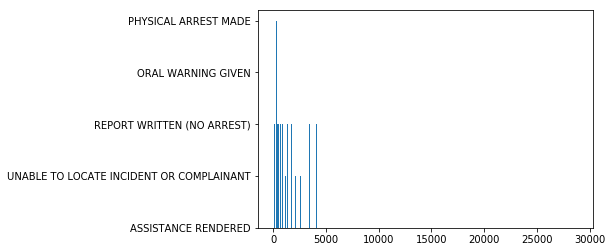

In [44]:

x = lewd_calls_ip.time_delta
y = lewd_calls_ip.event_clearing

plt.bar(x, y)
plt.show(); 


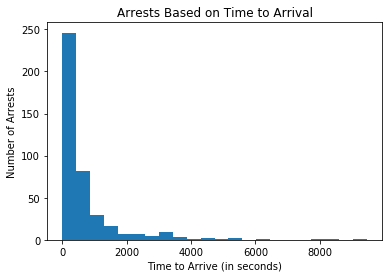

In [45]:
# Show value count by arrival time for PHYSICAL ARREST clearing code

# Create graph: value count by time for each clearing code
cc_mask = lewd_calls_ip['event_clearing'].str.contains("PHYSICAL ARREST")

# Also works, but not as good
#lewd_calls_ip[cc_mask].time_delta.hist(bins=15)
#plt.title("# Arrests based on time to arrival")



plt.hist(lewd_calls_ip[cc_mask].time_delta, bins=22)
plt.title("Arrests Based on Time to Arrival")
plt.xlabel("Time to Arrive (in seconds)")
plt.ylabel("Number of Arrests")
plt.show()

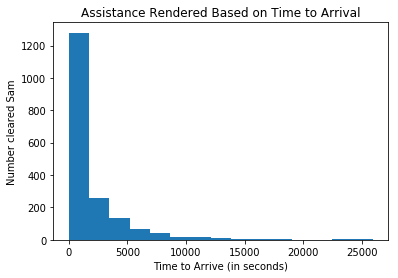

In [46]:
# Show value count by arrival time for ASSISTANCE RENDERED clearing code

cc_mask = lewd_calls_ip['event_clearing'].str.contains("ASSISTANCE RENDERED")

plt.hist(lewd_calls_ip[cc_mask].time_delta, bins=15)
plt.title("Assistance Rendered Based on Time to Arrival")
plt.xlabel("Time to Arrive (in seconds)")
plt.ylabel("Number cleared Sam")
plt.show()

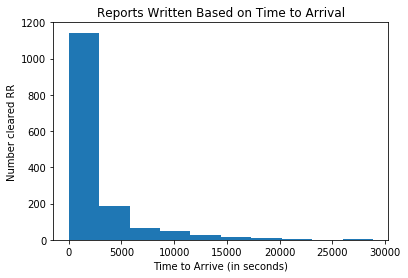

In [47]:
# Show value count by arrival time for ASSISTANCE RENDERED clearing code

cc_mask = lewd_calls_ip['event_clearing'].str.contains("REPORT WRITTEN")

plt.hist(lewd_calls_ip[cc_mask].time_delta, bins=10)
plt.title("Reports Written Based on Time to Arrival")
plt.xlabel("Time to Arrive (in seconds)")
plt.ylabel("Number cleared RR")
plt.show()

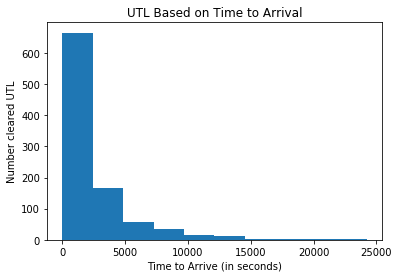

In [48]:
# Show value count by arrival time for UNABLE TO LOCATE clearing code

cc_mask = lewd_calls_ip['event_clearing'].str.contains("UNABLE TO LOCATE")

plt.hist(lewd_calls_ip[cc_mask].time_delta, bins=10)
plt.title("UTL Based on Time to Arrival")
plt.xlabel("Time to Arrive (in seconds)")
plt.ylabel("Number cleared UTL")
plt.show()

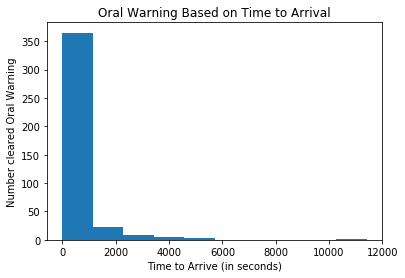

In [49]:
# Show value count by arrival time for ORAL WARNING clearing code

cc_mask = lewd_calls_ip['event_clearing'].str.contains("ORAL WARNING")
plt.hist(lewd_calls_ip[cc_mask].time_delta, bins=10)
plt.title("Oral Warning Based on Time to Arrival")
plt.xlabel("Time to Arrive (in seconds)")
plt.ylabel("Number cleared Oral Warning")
plt.show()

In [50]:

lewd_calls_ip.corr()

,priority,time_delta,year,month
priority,1.000000,0.199821,-0.028201,-0.016715
time_delta,0.199821,1.000000,0.112381,0.026413
year,-0.028201,0.112381,1.000000,-0.011035
month,-0.016715,0.026413,-0.011035,1.000000


### Create Sankey diagram:
* five horizontal flows correlating to each clearing code
* First checkpoint goes to one of ~5-6 time_delta buckets
* final checkpoint goes to how the call was cleared.